In [96]:

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
%matplotlib inline


In [97]:
df = pd.read_csv('C:/Users/Ala/Desktop/IT/outt.csv')
#df[["semaine1","semaine2","semaine3","semaine4"]] = df[["semaine1","semaine2","semaine3","semaine4"]].astype(int)
df

,prenomnomclient,ageclient,genreclient,salaire,semaine1,semaine2,semaine3,semaine4
0,Siala Ahmed,66,homme,700000,280500,53350,31900,130460
1,Hentati Hiba,31,femme,30000000,110000,40700,31240,25520
2,Belguith MOHAMED,45,homme,50000000,32450,124300,36300,416350
3,Gharsellaoui Mariem,24,femme,3200000,343200,74800,101200,40425
4,Gouiaa Mehdi,69,homme,2000000,874500,54450,93390,52800
...,...,...,...,...,...,...,...,...
235,Bibi mouna,53,femme,700000,29700,49500,905795,108900
236,Ayedi Moaez,47,homme,300000,106700,35750,250800,52800
237,ben slama marwa,33,femme,700000,28600,1760,69300,46200
238,Jerbi Khalil,69,homme,3000000,180027,41800,123200,32120


In [98]:
df.semaine3.mean()

176202.74583333332

# clustering

In [99]:
from sklearn.cluster import KMeans
X_train = df [['semaine1','semaine2','semaine3','semaine4']]
print(X_train.head())
kmeans = KMeans(n_clusters=3,random_state=2)
y= kmeans.fit(X_train)
y

   semaine1  semaine2  semaine3  semaine4
0    280500     53350     31900    130460
1    110000     40700     31240     25520
2     32450    124300     36300    416350
3    343200     74800    101200     40425
4    874500     54450     93390     52800


KMeans(n_clusters=3, random_state=2)

In [100]:
kmeans.cluster_centers_

array([[105944.61875   ,  94477.46875   , 177055.5       ,
        143400.2125    ],
       [110780.81818182, 623608.75      , 155105.        ,
        262778.75      ],
       [643929.30555556, 176685.08333333, 198198.86111111,
        151356.        ]])

c:\users\ala\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


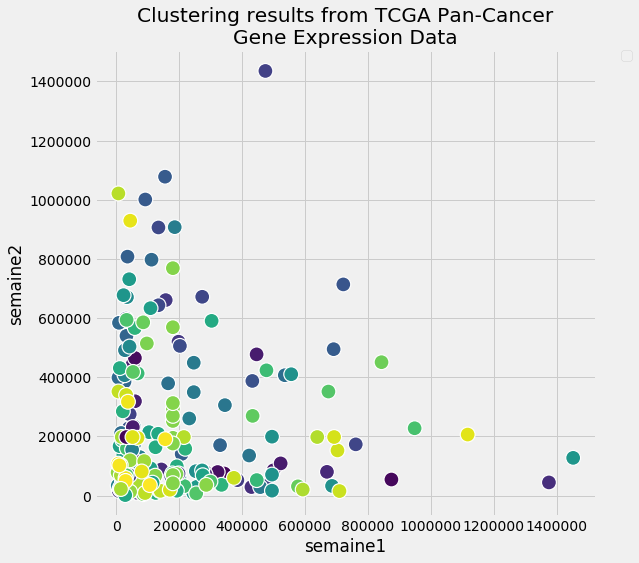

In [101]:
import seaborn as sns
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
labels,unique = pd.factorize(X_train.semaine1)

scat = sns.scatterplot(
     X_train.semaine1,
     X_train.semaine2,
     s=222,
     c= labels,
     palette="Set2",
)

scat.set_title(
    "Clustering results from TCGA Pan-Cancer\nGene Expression Data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

In [102]:
X=X_train.to_numpy()
y_kmeans = kmeans.predict(X)
y_kmeans

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1,
       0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 2, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 2,
       0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0, 1,
       0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 1, 1, 0,
       0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [103]:
df['KMEANS_Classes']=pd.Series(y_kmeans)

In [104]:
df.KMEANS_Classes.value_counts()

0    160
1     44
2     36
Name: KMEANS_Classes, dtype: int64

In [105]:
pd.get_dummies(df["KMEANS_Classes"])

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
235,1,0,0
236,1,0,0
237,1,0,0
238,1,0,0


In [106]:
df[['Class1','Class2','Class3']]= pd.get_dummies(df["KMEANS_Classes"])
df.drop("KMEANS_Classes",axis=1,inplace=True)
df

,prenomnomclient,ageclient,genreclient,salaire,semaine1,semaine2,semaine3,semaine4,Class1,Class2,Class3
0,Siala Ahmed,66,homme,700000,280500,53350,31900,130460,1,0,0
1,Hentati Hiba,31,femme,30000000,110000,40700,31240,25520,1,0,0
2,Belguith MOHAMED,45,homme,50000000,32450,124300,36300,416350,1,0,0
3,Gharsellaoui Mariem,24,femme,3200000,343200,74800,101200,40425,1,0,0
4,Gouiaa Mehdi,69,homme,2000000,874500,54450,93390,52800,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
235,Bibi mouna,53,femme,700000,29700,49500,905795,108900,1,0,0
236,Ayedi Moaez,47,homme,300000,106700,35750,250800,52800,1,0,0
237,ben slama marwa,33,femme,700000,28600,1760,69300,46200,1,0,0
238,Jerbi Khalil,69,homme,3000000,180027,41800,123200,32120,1,0,0


In [108]:
Class1= df[df.Class1 == 1]
Class1.drop("Class2",axis=1,inplace=True)
Class1.drop("Class3",axis=1,inplace=True)
Class1

c:\users\ala\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,prenomnomclient,ageclient,genreclient,salaire,semaine1,semaine2,semaine3,semaine4,Class1
0,Siala Ahmed,66,homme,700000,280500,53350,31900,130460,1
1,Hentati Hiba,31,femme,30000000,110000,40700,31240,25520,1
2,Belguith MOHAMED,45,homme,50000000,32450,124300,36300,416350,1
3,Gharsellaoui Mariem,24,femme,3200000,343200,74800,101200,40425,1
5,Boudaya Fatma,33,femme,1100000,283250,79200,12540,13640,1
...,...,...,...,...,...,...,...,...,...
235,Bibi mouna,53,femme,700000,29700,49500,905795,108900,1
236,Ayedi Moaez,47,homme,300000,106700,35750,250800,52800,1
237,ben slama marwa,33,femme,700000,28600,1760,69300,46200,1
238,Jerbi Khalil,69,homme,3000000,180027,41800,123200,32120,1


In [109]:
Class2= df[df.Class2 == 1]
Class2.drop("Class1",axis=1,inplace=True)
Class2.drop("Class3",axis=1,inplace=True)
Class2

c:\users\ala\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,prenomnomclient,ageclient,genreclient,salaire,semaine1,semaine2,semaine3,semaine4,Class2
10,Ayedi Kais,45,homme,5000000,29150,595925,539000,544500,1
15,abid Rania,60,femme,5000000,446050,477400,77990,275000,1
16,bouassida Khalil,25,homme,3200000,52800,445280,101200,584100,1
18,Frikha Sami,49,homme,90000000,59400,465300,81840,275000,1
33,Chaabene Maram,26,femme,90000000,198000,520300,34980,212465,1
34,LAHMAR Slim,40,homme,3000000,157300,660880,64460,53570,1
39,loukil Nesrine,30,femme,2000000,474100,1435500,57530,585200,1
43,zarrouk Manel,27,femme,90000000,273240,672100,48400,81840,1
45,sfar Imen,69,femme,3000000,134200,643500,558800,101750,1
47,BENALI ONS,49,femme,1100000,202400,506000,90200,283800,1


In [110]:
Class3= df[df.Class3 == 1]
Class3.drop("Class1",axis=1,inplace=True)
Class3.drop("Class2",axis=1,inplace=True)
Class3

c:\users\ala\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,prenomnomclient,ageclient,genreclient,salaire,semaine1,semaine2,semaine3,semaine4,Class3
4,Gouiaa Mehdi,69,homme,2000000,874500,54450,93390,52800,1
12,ben salah Kais,34,homme,6000000,451000,41800,21835,23100,1
13,louti Ines,25,femme,6000000,499950,85580,143000,37620,1
14,turki Yassine,69,homme,3200000,522500,108900,287100,27610,1
22,Ben Makhlouf Ali,50,homme,90000000,456720,26510,456500,667700,1
24,Elabed Taha,64,homme,5000000,669680,80300,42020,4895,1
27,loukil Rihab,61,femme,30000000,1375000,44550,44220,478500,1
28,belkhir Ayoub,29,homme,2000000,429660,28930,112200,264000,1
42,smida Hamza,37,homme,2000000,761200,173250,499950,87450,1
51,Trabelsi Tasnime,51,femme,3200000,432520,387640,231000,17380,1


In [112]:
Class1.to_csv (r'C:\Users\Ala\Desktop\IT\class1.csv', index = False, header=True)

In [113]:
Class2.to_csv (r'C:\Users\Ala\Desktop\IT\class2.csv', index = False, header=True)

In [114]:
Class3.to_csv (r'C:\Users\Ala\Desktop\IT\class3.csv', index = False, header=True)